<a href="https://colab.research.google.com/github/sajla97k/Python-ML/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Price Prediction for households in Boston***

* This dataset is about the details of boston households and various factors affecting the prices of household in the area.



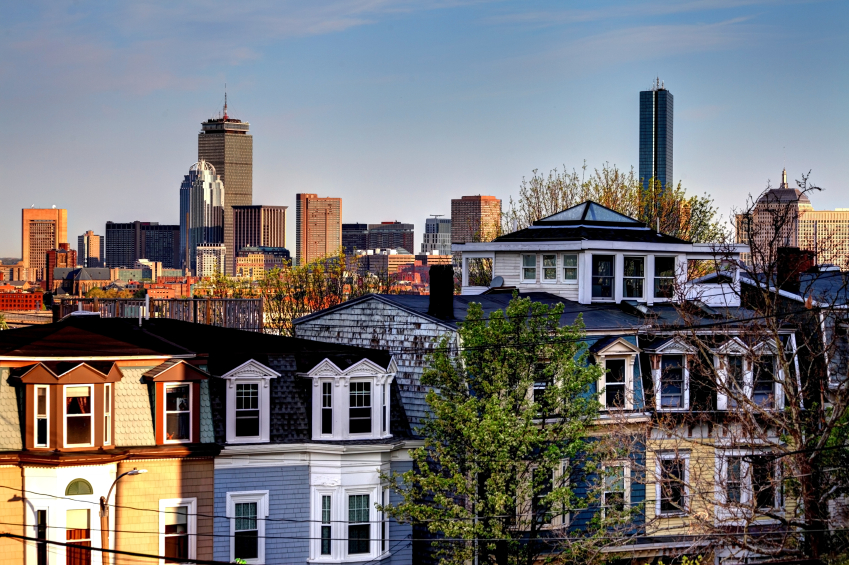

#*Column Informations*

* describing in brief about each column

1) CRIM : per capita crime rate by town

2) ZN : proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5) NOX : nitric oxides concentration (parts per 10 million)

6) RM : average number of rooms per dwelling

7) AGE : proportion of owner-occupied units built prior to 1940

8) DIS : weighted distances to five Boston employment centres

9) RAD : index of accessibility to radial highways

10) TAX : full-value property-tax rate per $10,000

11) PTRATIO : pupil-teacher ratio by town

12) B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

14) MEDV : Median value of owner-occupied homes in $1000's

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the housing dataset and loading the first 5 rows of the dataset.

dt = pd.read_csv('/content/drive/MyDrive/LUMINAR/DATASETS/Housing.csv')
dt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [ ]:
#shape of the dataset

dt.shape

(509, 14)

In [ ]:
# Checking the column names of the dataset

cols = dt.columns
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# cleaning process initiation

# checking for duplicate values ,and delete if present

dt.duplicated().sum()

4

In [ ]:
# deleting the duplicated columns

dt = dt.drop_duplicates()
dt.duplicated().sum()

0

In [ ]:
# Checking for null values

dt.isna().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

As we can see there are null values present in the columns namely INDUS,NOX,AGE,RAD and LSTAT.

In [ ]:
#checking unique of the columns where null avalues are present

lst = ['INDUS','NOX','AGE','RAD','LSTAT']
for i in lst:
  print(dt[i].unique(),i)
  print('______________________________________')

[ 2.31  7.07  2.18  7.87  8.14  5.96  2.95  6.91   nan  5.64  4.    1.22
  0.74  1.32  5.13  1.38  3.37  6.07 10.81 12.83  4.86  4.49  3.41 15.04
  2.89  8.56 10.01 25.65 21.89 19.58  4.05  2.46  3.44  2.93  0.46  1.52
  1.47  2.03  2.68 10.59 13.89  6.2   4.93  5.86  3.64  3.75  3.97  6.96
  6.41  3.33  1.21  2.97  2.25  1.76  5.32  4.95 13.92  2.24  6.09  9.9
  7.38  3.24  6.06  5.19  1.89  3.78  4.39  4.15  2.01  1.25  1.69  2.02
  1.91 18.1  27.74  9.69 11.93] INDUS
______________________________________
[0.538  0.469  0.458  0.524  0.499  0.428  0.448  0.439  0.41   0.403
 0.411  0.453  0.4161 0.398  0.409  0.413     nan 0.437  0.426  0.449
 0.489  0.464  0.445  0.52   0.547  0.581  0.624  0.871  0.605  0.51
 0.488  0.401  0.422  0.404  0.415  0.55   0.507  0.504  0.431  0.392
 0.394  0.647  0.575  0.447  0.4429 0.4    0.389  0.385  0.405  0.433
 0.472  0.544  0.493  0.46   0.4379 0.515  0.442  0.518  0.484  0.429
 0.435  0.77   0.718  0.631  0.668  0.671  0.7    0.693  0.659  0.5

There are various methods by which we can handle null or missing values like forwardfill,backwardfill,filling using values like mean , median , mode. let us look at the datset again..

In [ ]:
dt.head()


Here the columns..

* INDUS: proportion of non-retail business acres per town
* NOX : nitric oxides concentration (parts per 10 million)
*  AGE : proportion of owner-occupied units built prior to 1940
* RAD : index of accessibility to radial highways
* LSTAT: % lower status of the population

as we can see these values are mostly point values..hence we can use whichever method here  i am using mean value to fill each column

In [ ]:
#filling each column using median value of each column

dt['INDUS'] = dt['INDUS'].fillna(dt['INDUS'].median())
dt['NOX'] = dt['NOX'].fillna(dt['NOX'].median())
dt['AGE'] = dt['AGE'].fillna(dt['AGE'].median())
dt['RAD'] = dt['RAD'].fillna(dt['RAD'].median())
dt['LSTAT'] = dt['LSTAT'].fillna(dt['LSTAT'].median())

In [ ]:
dt.isna().sum()


In [ ]:
dt.info()


In [ ]:
# converting dtype of ZN,AGE,RAD to int

dt['ZN'] = dt['ZN'].astype(int)
dt['AGE'] = dt['AGE'].astype(int)
dt['RAD'] = dt['RAD'].astype(int)

In [ ]:
dt.info()


In [ ]:
# Getting the statistical measures of the dataset

dt.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.606091,11.370297,11.151307,0.069307,0.554679,6.284816,68.114851,3.798725,9.522772,407.726733,18.452079,357.188772,12.654079,22.555644
std,8.608447,23.328220,6.843323,0.254227,0.115693,0.703302,28.216754,2.106167,8.690899,168.312294,2.165696,90.647420,7.121604,9.191851
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100700,4.000000,279.000000,17.400000,375.520000,7.010000,17.100000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.209000,77.000000,3.215700,5.000000,330.000000,19.000000,391.450000,11.360000,21.200000
75%,3.673670,12.000000,18.100000,0.000000,0.624000,6.625000,94.000000,5.211900,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#***Data Visualisation***

Histogram
* A histogram is a display of statistical information that uses rectangles to show the frequency of data items in successive numerical intervals of equal size

In [ ]:
# According to numerical dataset visualization for histplot
#df.hist(bins=50,figsize=(20,15))
#plt.show()

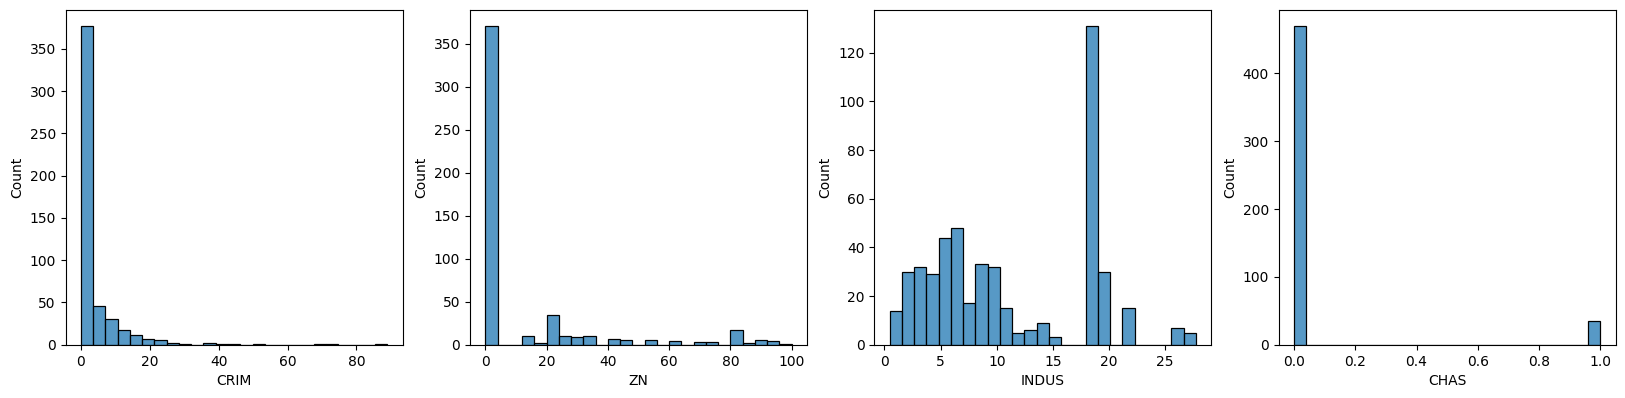

In [ ]:
## According to numerical dataset visualization for histplot
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(dt["CRIM"],bins=25)
plt.subplot(4,4,2)
sns.histplot(dt["ZN"],bins=25)
plt.subplot(4,4,3)
sns.histplot(dt["INDUS"],bins=25)
plt.subplot(4,4,4)
sns.histplot(dt["CHAS"],bins=25)
plt.show()


1) From CRIM column it is clear that zero crime properties are 350 and above.

2) From column ZN the value of 0 is 350 above and the proportion of residential land zoned is 20 to 90 above.

3) In INDUS column highest frequenncy 120 is shown in 17 to 20 range .

4) In CHAS the highest value 400 and above in 0 .

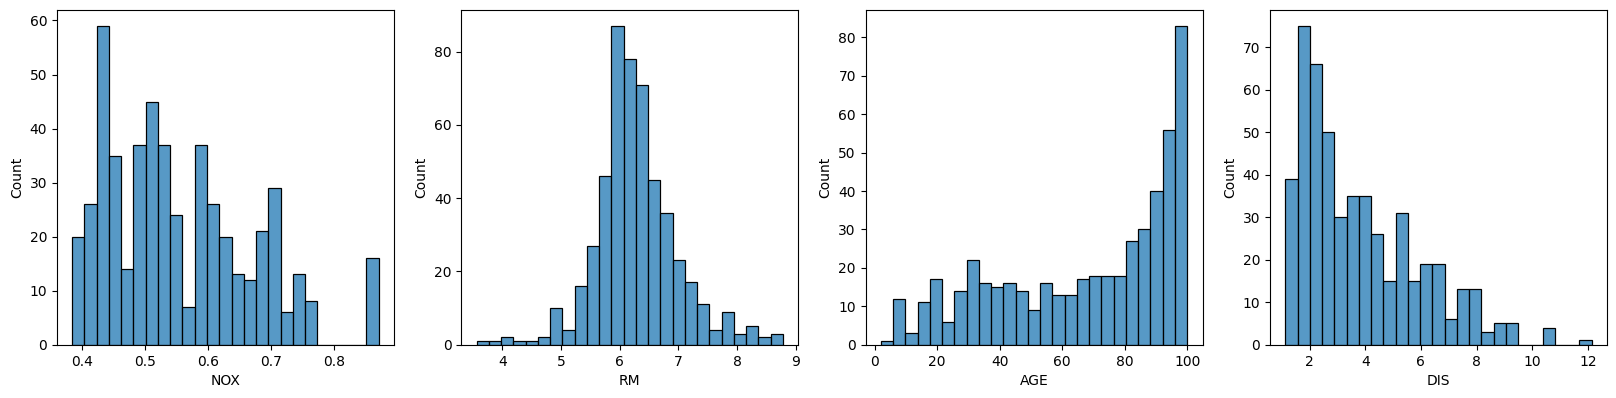

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(dt["NOX"],bins=25)
plt.subplot(4,4,2)
sns.histplot(dt["RM"],bins=25)
plt.subplot(4,4,3)
sns.histplot(dt["AGE"],bins=25)
plt.subplot(4,4,4)
sns.histplot(dt["DIS"],bins=25)
plt.show()


1) In NOX column the highest values ranges from 0.4 to 0.7 and the peak value is between 0.4 and 0.5.

2) In RM column the peak value of RM ranges between 5 and 7.

3) IN AGE column as we can see most of the properties are 80 years old and above

4) From DIS column most of the properties are in 1 to 4 km radius or distance.

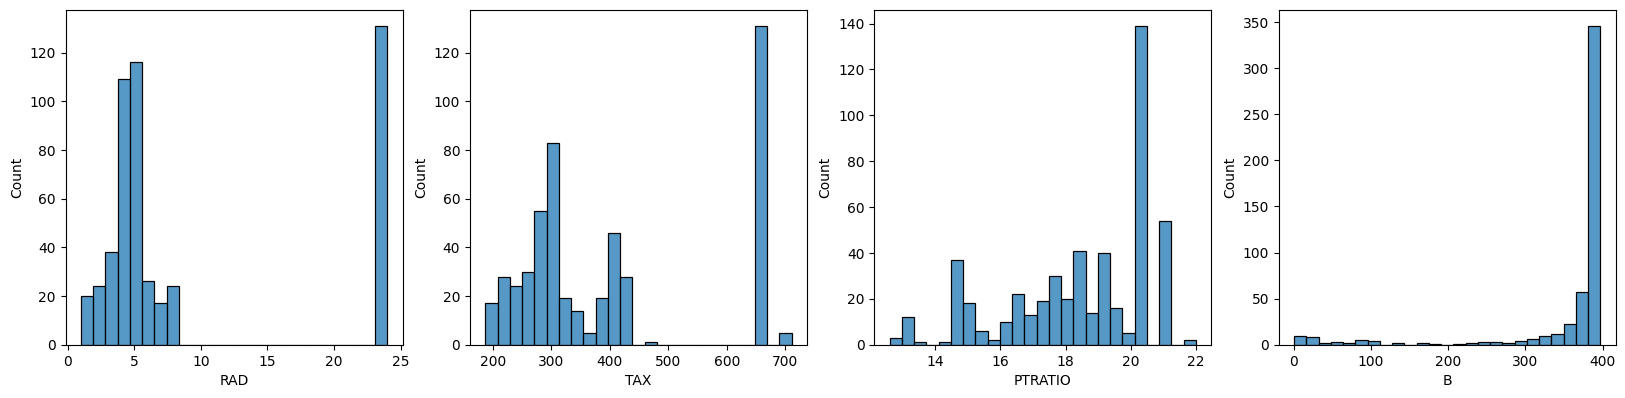

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.histplot(dt["RAD"],bins=25)
plt.subplot(4,4,2)
sns.histplot(dt["TAX"],bins=25)
plt.subplot(4,4,3)
sns.histplot(dt["PTRATIO"],bins=25)
plt.subplot(4,4,4)
sns.histplot(dt["B"],bins=25)
plt.show()

1) the RAD column shows most of the properties near road are 20 t 25 km an their freq range is 120 also average values lies between 2 and 5.

2) FRom TAX column the highest frequency is 120 and above and the highest tax paid properties lies in range 650 to 700.

3) From PTRATIO column highest is 120 ranging from 20 to 21.

4) From B column the values lie mostly between 300 and 400

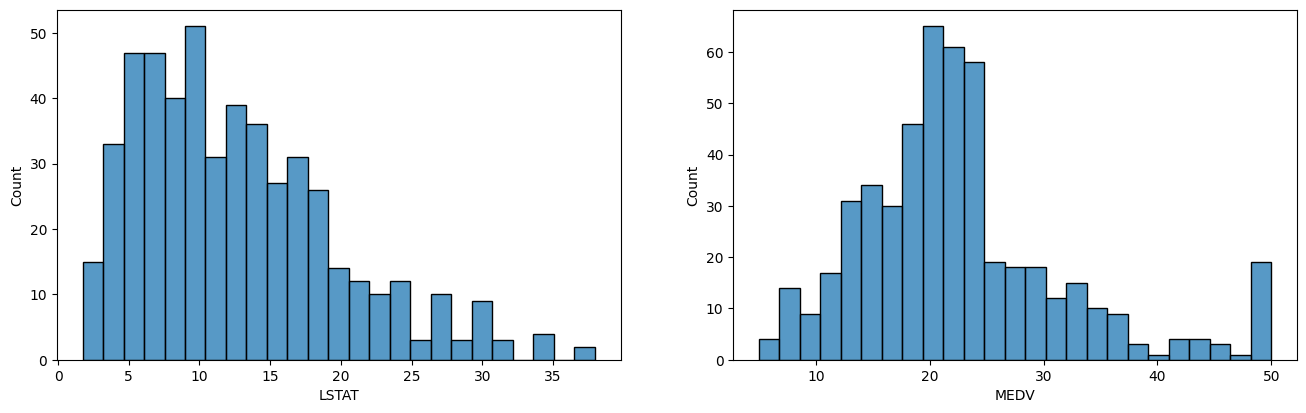

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(dt["LSTAT"],bins=25)
plt.subplot(2,2,2)
sns.histplot(dt["MEDV"],bins=25)
plt.show()

1) LSTAT the frequency range is 25 and above and the range 5 to 20 represent the highest amount of low status people in housing.

2) MEDV column values range 35 and above in 10 to 30

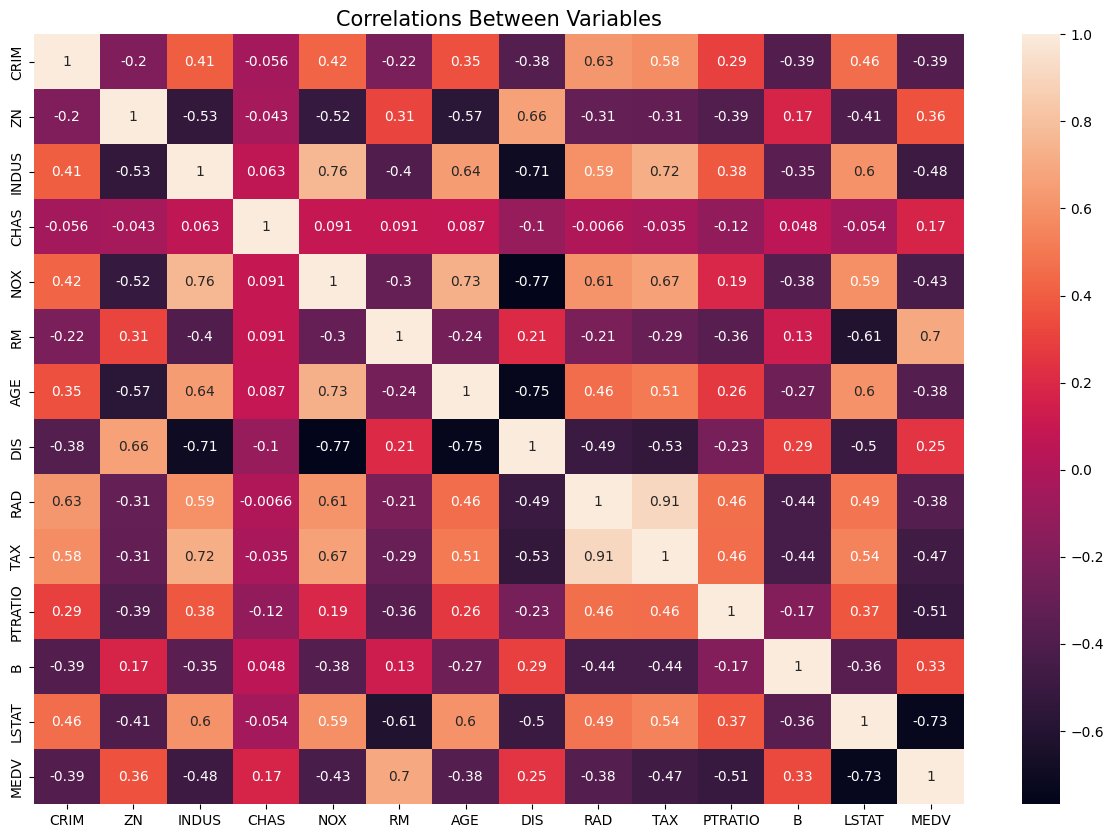

In [ ]:
# Correlaytion between numerical values

plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(),annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

#***Model fitting***

In [ ]:
dt.head()


In [ ]:
x = dt.drop('MEDV',axis = 1)
y = dt['MEDV']

In [ ]:
x.head()


In [ ]:
y.head()


Train test splitting for training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 40)

In [ ]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

#***Linear Regression model***

In [ ]:
# Import the sklearn necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Create a linear regression model
ln_model = LinearRegression()

# Fit the model to the training data
ln_model.fit(x_train,y_train)


# Predict the prices on the test data
y_pred = ln_model.predict(x_test)


In [ ]:
training_score_1 = ln_model.score(x_train,y_train)
training_score_1

0.749438016761867

In [ ]:
testing_score_1 = ln_model.score(x_test,y_test)
testing_score_1

0.6919878905813307

as we can see there is not much difference between trainingg and testing score so we can say it is a good model

In [ ]:
# Calculate the mean_absolute_error and mean_squared_error , r2_score
mae_1 = mean_absolute_error(y_test,y_pred)
rmse_1 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_1 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_1,3))
print("root_mean_squared_error:",round(rmse_1,3))
print("r2_score:",round(r2_1,3))

mean_absolute_error: 4.412
root_mean_squared_error: 5.911
r2_score: 0.692


In [ ]:
# for r2_score we can also show the slope and intercept

print("slope",ln_model.coef_)  #to show slope

print("y intercept",ln_model.intercept_)   #to show intercept

slope [-0.92337088  1.07274153 -0.13258899  0.66384939 -1.75227187  2.75114037
 -0.1969432  -2.86871819  2.38158619 -1.92730223 -1.82344558  0.59381569
 -3.28406125]
y intercept 22.700495049504955


#***Decision Tree Model***


* Decision tree is a tree like predictive model used for regression and classification probelms.it is tree like structure.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# assigning decision tree regressor to dt_model

dt_model = DecisionTreeRegressor()

#fitting decision tree model

dt_model.fit(x_train,y_train)

#predicting the rsult using test data

y_pred = dt_model.predict(x_test)


In [ ]:
training_score_2 = dt_model.score(x_train,y_train)
training_score_2

1.0

In [ ]:
testing_score_2 = dt_model.score(x_test,y_test)
testing_score_2

0.5639807916655663

In [ ]:
# Calculate the mean_absolute_error and mean_squared_error , r2_score

mae_2 = mean_absolute_error(y_test,y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_2 = r2_score(y_test,y_pred)
print("mean_absolute_error:",round(mae_2,3))
print("root_mean_squared_error:",round(rmse_2,3))
print("r2_score:",round(r2_2,3))

mean_absolute_error: 4.289
root_mean_squared_error: 7.033
r2_score: 0.564


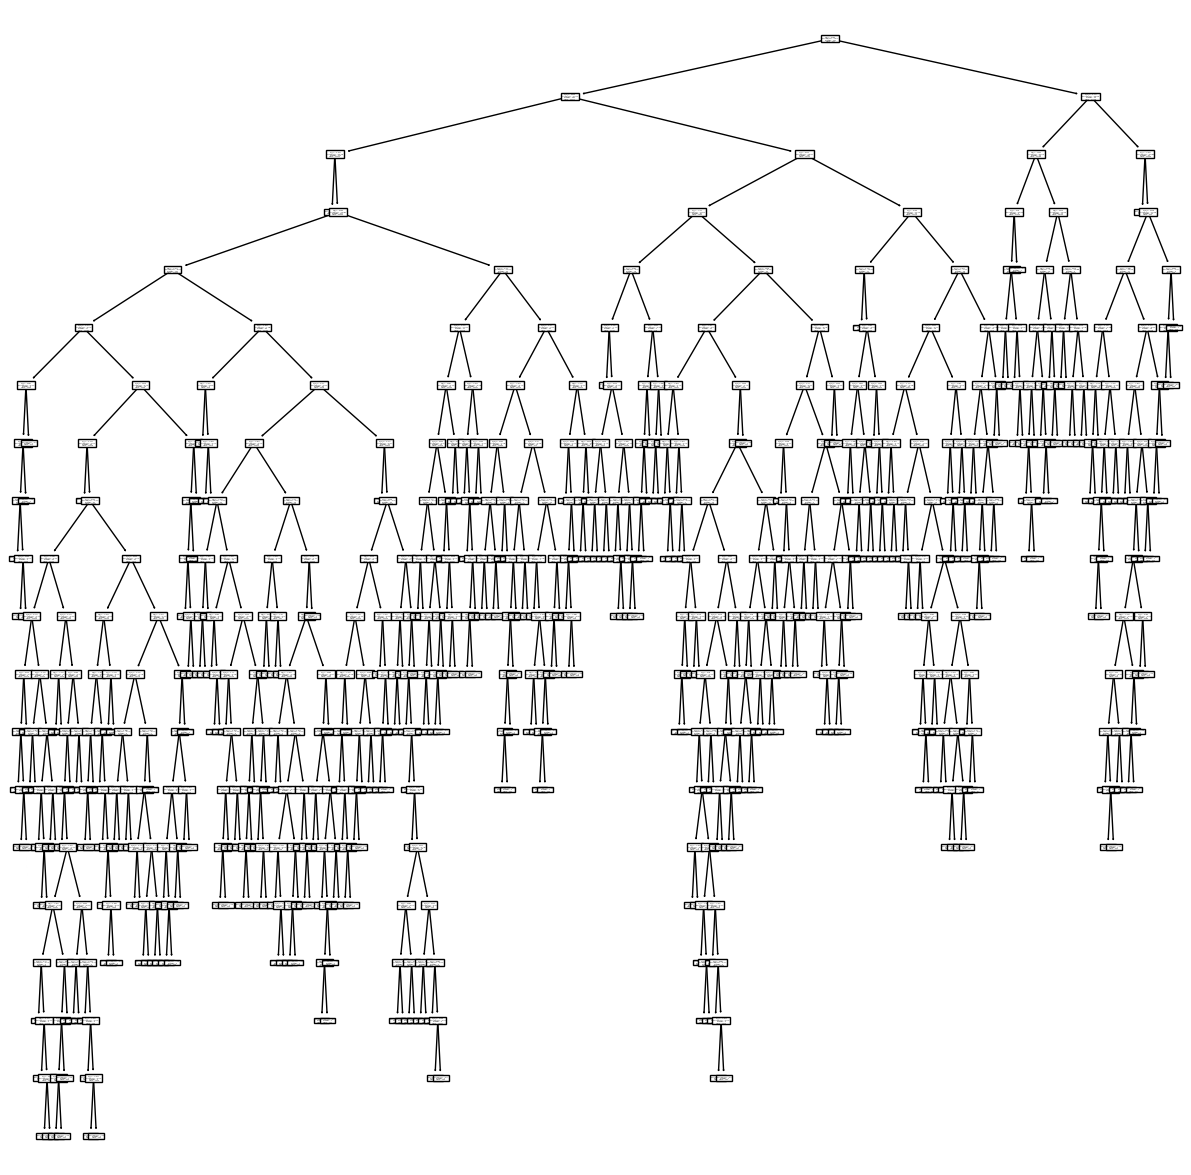

In [ ]:
#plotting the desion tree using matplotlib

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
tree.plot_tree(dt_model);

#***Random Forest Regressor***

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.



In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()

# fitiing model to the data

rf_model.fit(x_train,y_train)

#predicting the result using the test data

y_pred = rf_model.predict(x_test)


In [ ]:
training_score_3 = rf_model.score(x_train,y_train)
training_score_3

0.9790415979309196

In [ ]:
testing_score_3 = rf_model.score(x_test,y_test)
testing_score_3

0.7224602141949282

In [ ]:
# Calculate the mean_absolute_error and mean_squared_error , r2_score

mae_3 = mean_absolute_error(y_test,y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_3 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_3,3))
print("root_mean_squared_error:",round(rmse_3,3))
print("r2_score:",round(r2_3,3))

mean_absolute_error: 3.742
root_mean_squared_error: 5.611
r2_score: 0.722


#***K Nearest Neighbour model***

* he target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

# fitting the model

knn_model.fit(x_train,y_train)

# predicting using test data

y_pred = knn_model.predict(x_test)



In [ ]:
training_score_4 = knn_model.score(x_train,y_train)
training_score_4

0.8253054855633789

In [ ]:
testing_score_4 = knn_model.score(x_test,y_test)
testing_score_4

0.7001111040975965

In [ ]:
mae_4 = mean_absolute_error(y_test,y_pred)
rmse_4 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_4 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_4,3))
print("root_mean_squared_error:",round(rmse_4,3))
print("r2_score:",round(r2_4,3))

mean_absolute_error: 3.925
root_mean_squared_error: 5.832
r2_score: 0.7


#***SVM model***

* (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups

In [ ]:
from sklearn.svm import SVR

sv_model = SVR()

#model fitting

sv_model.fit(x_train,y_train)

#predicting model

y_pred = sv_model.predict(x_test)



In [ ]:
training_score_5 = sv_model.score(x_train,y_train)
training_score_5

0.6925605751317039

In [ ]:
testing_score_5 = sv_model.score(x_test,y_test)
testing_score_5

0.5966452922918623

In [ ]:
#calculating errors and r2 score

mae_5 = mean_absolute_error(y_test,y_pred)
rmse_5 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_5 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_5,3))
print("root_mean_squared_error:",round(rmse_5,3))
print("r2_score:",round(r2_5,3))

mean_absolute_error: 4.262
root_mean_squared_error: 6.764
r2_score: 0.597


#***ADA boost Regressor***



In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor()

ab_model.fit(x_train,y_train)

y_pred = ab_model.predict(x_test)

In [ ]:
training_score_6 = ab_model.score(x_train,y_train)
training_score_6

0.9069315337288832

In [ ]:
testing_score_6 = ab_model.score(x_test,y_test)
testing_score_6

0.6878025476558727

In [ ]:
#calculating errors and r2 score

mae_6 = mean_absolute_error(y_test,y_pred)
rmse_6 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_6 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_6,3))
print("root_mean_squared_error:",round(rmse_6,3))
print("r2_score:",round(r2_6,3))

mean_absolute_error: 4.17
root_mean_squared_error: 5.944
r2_score: 0.689


#Comparing the models

In [ ]:
cm = pd.DataFrame({'model_names':['Linear_Regression','DEcision_Tree','Random_Forest','KNearest_Neighbour','SVM','Ada_boost'],'mean_absolute_error':[mae_1,mae_2,mae_3,mae_4,mae_5,mae_6],'root_mean_squared':[rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6],'r2_score':[r2_1,r2_2,r2_3,r2_4,r2_5,r2_6],'training_score':[training_score_1,training_score_2,training_score_3,training_score_4,training_score_5,training_score_6],'testing_score':[testing_score_1,testing_score_2,testing_score_3,testing_score_4,testing_score_5,testing_score_6]})
cm

,model_names,mean_absolute_error,root_mean_squared,r2_score,training_score,testing_score
0,Linear_Regression,4.411655,5.910902,0.691988,0.749438,0.691988
1,DEcision_Tree,4.289109,7.032710,0.563981,1.000000,0.563981
2,Random_Forest,3.742198,5.610900,0.722460,0.979042,0.722460
3,KNearest_Neighbour,3.924950,5.832437,0.700111,0.825305,0.700111
4,SVM,4.261905,6.764154,0.596645,0.692561,0.596645
5,Ada_boost,4.169509,5.943579,0.688573,0.906932,0.687803
